<a href="https://colab.research.google.com/github/ucfilho/marquesgabi_paper_fev_2021/blob/main/defesa/PSD_histogram_final_amostra_03_nov_25_2021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import zipfile
#import random
from random import randint
from PIL import Image
import re
from sklearn.model_selection import train_test_split
#import scikit-image
import skimage
import sklearn
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense, Activation, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization
from sklearn.metrics import r2_score
from google.colab import files

In [2]:
#!pip install mahotas

In [3]:
'''
import mahotas.features.texture as mht
import mahotas.features
'''

'\nimport mahotas.features.texture as mht\nimport mahotas.features\n'

In [4]:
'''
!git clone https://github.com/ucfilho/marquesgabi_fev_2020 #clonar do Github
%cd marquesgabi_fev_2020
import Go2BlackWhite
import Go2Mahotas
'''

'\n!git clone https://github.com/ucfilho/marquesgabi_fev_2020 #clonar do Github\n%cd marquesgabi_fev_2020\nimport Go2BlackWhite\nimport Go2Mahotas\n'

In [5]:
def BlackWhite(Transfere,Size):

  img_name=[]
  xw=[]
  ww=[]

  with zipfile.ZipFile(Transfere, "r") as f:
    for name in f.namelist():
      img_name.append(name)
      #xw.append(cv2.imread(name))
      xw.append(cv2.resize(cv2.imread(name),(Size,Size)))

  nrow=len(img_name)
  ncol=Size*Size
  pw=np.zeros((nrow,ncol))
  #pw=[]
  for i in range(nrow):
    ww.append(cv2.cvtColor(np.array(xw[i]), cv2.COLOR_BGR2GRAY))
    pw[i,:]=ww[i].ravel()
  return ww,img_name

In [6]:
!git clone https://github.com/marquesgabi/Doutorado
%cd Doutorado

Transfere='Fotos_Grandes_3cdAmostra.zip' 
file_name = zipfile.ZipFile(Transfere, 'r')
file_name.extractall()

fatal: destination path 'Doutorado' already exists and is not an empty directory.
/content/Doutorado


In [7]:
labels =[]
with zipfile.ZipFile(Transfere, "r") as f:
  for f in f.namelist():
    labels.append(f)
print(labels)

['Fotos_Grandes-3cdAmostra/Q6-8-4.jpg', 'Fotos_Grandes-3cdAmostra/Q6-5-3.jpg', 'Fotos_Grandes-3cdAmostra/Q6-7-4.jpg', 'Fotos_Grandes-3cdAmostra/Q6-8-2.jpg', 'Fotos_Grandes-3cdAmostra/Q6-3-2.jpg', 'Fotos_Grandes-3cdAmostra/Q6-7-2.jpg', 'Fotos_Grandes-3cdAmostra/Q6-4-4.jpg', 'Fotos_Grandes-3cdAmostra/Q6-9-5.jpg', 'Fotos_Grandes-3cdAmostra/Q6-2-5.jpg', 'Fotos_Grandes-3cdAmostra/Q6-8-3.jpg', 'Fotos_Grandes-3cdAmostra/Q6-9-3.jpg', 'Fotos_Grandes-3cdAmostra/Q6-1-2.jpg', 'Fotos_Grandes-3cdAmostra/Q6-6-3.jpg', 'Fotos_Grandes-3cdAmostra/Q6-3-4.jpg', 'Fotos_Grandes-3cdAmostra/Q6-1-4.jpg', 'Fotos_Grandes-3cdAmostra/Q6-6-2.jpg', 'Fotos_Grandes-3cdAmostra/Q6-4-3.jpg', 'Fotos_Grandes-3cdAmostra/Q6-7-3.jpg', 'Fotos_Grandes-3cdAmostra/Q6-2-2.jpg', 'Fotos_Grandes-3cdAmostra/Q6-9-2.jpg', 'Fotos_Grandes-3cdAmostra/Q6-1-5.jpg', 'Fotos_Grandes-3cdAmostra/Q6-6-5.jpg', 'Fotos_Grandes-3cdAmostra/Q6-2-1.jpg', 'Fotos_Grandes-3cdAmostra/Q6-5-2.jpg', 'Fotos_Grandes-3cdAmostra/Q6-4-1.jpg', 'Fotos_Grandes-3cdAmostr

In [8]:
Size=1200 # tamanho da foto
# ww,img_name=Go2BlackWhite.BlackWhite(Transfere,Size) #Pegamos a primeira foto Grande
ww,img_name=BlackWhite(Transfere,Size) #Pegamos a primeira foto Grande
img=ww[4] 
# this is the big image we want to segment 
# ww[0], change it if you want to segment another picture

In [9]:
!git clone https://github.com/ucfilho/MarquesGabi_Routines
%cd MarquesGabi_Routines

fatal: destination path 'MarquesGabi_Routines' already exists and is not an empty directory.
/content/Doutorado/MarquesGabi_Routines


In [10]:
FILE='SugarSample03.zip'
img_name=[]
x_original = [] 

data_file ='xls'


file_name = zipfile.ZipFile(FILE, 'r')
file_name.extractall()

k = 0
with zipfile.ZipFile(FILE, "r") as f:
    for name in f.namelist():
      if(name[-3:] == data_file):
        #df =pd.read_csv(name)
        if( k > 0):
          df_old = df_ImgJ.copy()
        df_ImgJ = pd.read_excel(name)
        df_ImgJ = df_ImgJ.drop(labels=[0], axis=0)
        if(k > 0):
          df_ImgJ = pd.concat( [df_ImgJ, df_old], ignore_index = True)
        k = k + 1

In [11]:
f.namelist()

['Results_03_02.xls', 'Results_03_03.xls', 'Results_03_01.xls']

In [12]:
df_ImgJ.head()

,,Area,Mean,Min,Max,Major,Minor,Angle,Feret,FeretX,FeretY,FeretAngle,MinFeret
0,2,1.288,255,255,255,1.383,1.185,5.847,1.636,767,213,18.157,1.161
1,3,0.407,255,255,255,0.814,0.637,62.186,0.877,283,234,59.036,0.667
2,4,0.592,255,255,255,0.925,0.815,117.923,1.078,633,154,122.335,0.802
3,5,1.391,255,255,255,1.435,1.235,29.966,1.564,1321,333,53.253,1.165
4,6,0.549,255,255,255,0.923,0.758,136.396,1.024,370,254,118.237,0.738


In [13]:
from Segment_Filter import Segmenta  # got image provided segmented

In [14]:
df=Segmenta(img)
Img_Size = 28

In [15]:
print(df)

    Width           0           1  ...         781         782         783
0     143  128.641693  134.709366  ...  185.119705  185.375015  188.121582
1     125  135.858765  134.134079  ...  190.103699  199.079315  200.879501
2     187  206.851807  204.384018  ...  195.234711  164.001541  183.304428
3     117  192.990585  175.238800  ...  168.930679  161.112000  123.847321
4     130  144.270065  172.452332  ...  129.588882  167.569244  151.101059
5     151  120.834038  137.649277  ...    0.623788    0.332398    1.405245
6     108  173.115219  170.936890  ...  155.703690  156.274338  155.990387
7     197  192.117905  139.849442  ...    1.462548    0.193383    1.300858
8     176  148.141006  139.366730  ...    1.104339    0.153409    1.343492
9     134   61.823120   63.769215  ...    0.327244    0.506349    1.461573
10    186  167.432785  173.097031  ...  138.006943  143.771652  143.122101
11    147  169.925156  176.868500  ...  146.083908  147.437653  131.419510
12    178  247.531662  24

In [16]:
!git clone https://github.com/ucfilho/MarquesGabi_Routines
%cd MarquesGabi_Routines

fatal: destination path 'MarquesGabi_Routines' already exists and is not an empty directory.
/content/Doutorado/MarquesGabi_Routines/MarquesGabi_Routines


In [17]:
# leitura dos dados
df=pd.read_excel("FotosTreinoRede.xlsx")
y = df['y']
df.drop(['Unnamed: 0','y'], axis='columns', inplace=True)

In [18]:
X =np.array(df.copy())/255.0 


X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.30, shuffle=True, random_state=42)

In [19]:
# helper
def ynindicator(Y):
  N = len(Y)
  K = len(set(Y))
  I = np.zeros((N, K))
  I[np.arange(N), Y] = 1
  return I

def yback(Y_test):
  nrow, ncol = Y_test.shape
  y_class = np.zeros(nrow,dtype=int)
  y_resp = Y_test
  for k in range(nrow):
    for kk in range(K):
      if(y_resp[k,kk] == 1):
        y_class[k] = kk
  Y_test = y_class.copy()
  return Y_test

X_train = np.array(X_train)
Y_train = np.array(Y_train)
K = len(set(Y_train))

X_train = X_train.reshape(-1, Img_Size, Img_Size, 1) / 255.0
Y_train = Y_train.astype(np.int32)
Y_train = ynindicator(Y_train)

X_test = np.array(X_test )
Y_test = np.array(Y_test)
X_test = X_test.reshape(-1, Img_Size, Img_Size, 1) / 255.0
Y_test = Y_test.astype(np.int32)
Y_test = ynindicator(Y_test)

# the model will be a sequence of layers

Description = '3 layers of Convolution: 64, 128, 256 '
N1 = 20
N2 = 20

# make the CNN
model = Sequential()
model.add(Conv2D(input_shape=(Img_Size, Img_Size, 1), filters=64, kernel_size=(3, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Conv2D(filters=128, kernel_size=(3, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Conv2D(filters=256, kernel_size=(3, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(units=N1))
model.add(Dropout(0.2))
model.add(Dense(units=N2))
model.add(Activation('relu'))
#model.add(Dropout(0.2))
model.add(Dense(units=K))
model.add(Activation('softmax'))


# list of losses: https://keras.io/losses/
# list of optimizers: https://keras.io/optimizers/
# list of metrics: https://keras.io/metrics/
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [20]:

# training the model
r = model.fit(X_train, Y_train, validation_data=(X_test,Y_test), 
              epochs=200, batch_size=32)

Epoch 1/200
11/11 [==============================] - 3s 152ms/step - loss: 0.5134 - accuracy: 0.7930 - val_loss: 0.6929 - val_accuracy: 0.5102
Epoch 2/200
11/11 [==============================] - 1s 132ms/step - loss: 0.2737 - accuracy: 0.8805 - val_loss: 0.6929 - val_accuracy: 0.5102
Epoch 3/200
11/11 [==============================] - 1s 131ms/step - loss: 0.1630 - accuracy: 0.9300 - val_loss: 0.6930 - val_accuracy: 0.5102
Epoch 4/200
11/11 [==============================] - 1s 126ms/step - loss: 0.1084 - accuracy: 0.9563 - val_loss: 0.6930 - val_accuracy: 0.4898
Epoch 5/200
11/11 [==============================] - 1s 127ms/step - loss: 0.0561 - accuracy: 0.9796 - val_loss: 0.6942 - val_accuracy: 0.4898
Epoch 6/200
11/11 [==============================] - 1s 125ms/step - loss: 0.0895 - accuracy: 0.9679 - val_loss: 0.6939 - val_accuracy: 0.4898
Epoch 7/200
11/11 [==============================] - 1s 126ms/step - loss: 0.0472 - accuracy: 0.9854 - val_loss: 0.6931 - val_accuracy: 0.4898

In [21]:
Y_test = yback(Y_test)

In [22]:
# pred_test= model.predict_classes(X_test)
pred_test = np.argmax(model.predict(X_test), axis=-1)

data = {'y_true': Y_test,'y_predict': pred_test}  # este dado esta no formato de dicionario

df = pd.DataFrame(data, columns=['y_true','y_predict'])


confusion_matrix = pd.crosstab(df['y_true'], df['y_predict'], rownames=['Actual'], colnames=['Predict'])
print(confusion_matrix)

y_true = df['y_true']
y_pred = df['y_predict']

  
METRICS=sklearn.metrics.classification_report(y_true, y_pred)

Predict   0   1
Actual         
0        65   7
1         1  74


In [23]:
print(METRICS)

              precision    recall  f1-score   support

           0       0.98      0.90      0.94        72
           1       0.91      0.99      0.95        75

    accuracy                           0.95       147
   macro avg       0.95      0.94      0.95       147
weighted avg       0.95      0.95      0.95       147



In [24]:
'''
#X =np.array(df.copy())/255.0 
X =np.array(df.copy())
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, shuffle=True, random_state=42)
model = MLPClassifier(hidden_layer_sizes=(200,10), activation='tanh', solver='adam',random_state=1, max_iter=300).fit(X_train,y_train)  
prediction = model.predict(X_test)  
y =np.copy(y_test)
data = {'y_true': y_test,'y_predict': prediction}  
# este dado esta no formato de dicionario
df = pd.DataFrame(data, columns=['y_true','y_predict'])
confusion_matrix = pd.crosstab(df['y_true'], df['y_predict'], rownames=['Actual'], colnames=['Predict'])
print(confusion_matrix)
y_true = df['y_true']
y_pred = df['y_predict']  
METRICS=sklearn.metrics.classification_report(y_true, y_pred)
print(METRICS)
#X =np.array(df.copy())/255.0 X =np.array(df_all.copy())X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, shuffle=True, random_state=42)model = MLPClassifier(hidden_layer_sizes=(200,10), activation='tanh',                       solver='adam',random_state=1, max_iter=300).fit(X_train,y_train)  prediction = model.predict(X_test)  y =np.copy(y_test)data = {'y_true': y_test,'y_predict': prediction}  # este dado esta no formato de dicionariodf = pd.DataFrame(data, columns=['y_true','y_predict'])confusion_matrix = pd.crosstab(df['y_true'], df['y_predict'], rownames=['Actual'], colnames=['Predict'])print(confusion_matrix)y_true = df['y_true']y_pred = df['y_predict']
'''

"\n#X =np.array(df.copy())/255.0 \nX =np.array(df.copy())\nX_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, shuffle=True, random_state=42)\nmodel = MLPClassifier(hidden_layer_sizes=(200,10), activation='tanh', solver='adam',random_state=1, max_iter=300).fit(X_train,y_train)  \nprediction = model.predict(X_test)  \ny =np.copy(y_test)\ndata = {'y_true': y_test,'y_predict': prediction}  \n# este dado esta no formato de dicionario\ndf = pd.DataFrame(data, columns=['y_true','y_predict'])\nconfusion_matrix = pd.crosstab(df['y_true'], df['y_predict'], rownames=['Actual'], colnames=['Predict'])\nprint(confusion_matrix)\ny_true = df['y_true']\ny_pred = df['y_predict']  \nMETRICS=sklearn.metrics.classification_report(y_true, y_pred)\nprint(METRICS)\n#X =np.array(df.copy())/255.0 X =np.array(df_all.copy())X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, shuffle=True, random_state=42)model = MLPClassifier(hidden_layer_sizes=(200,10), activation='ta

In [25]:
pred_test

array([1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1])

In [26]:
cont = 0; num =25
img_graos = []
Width_new = []
img=ww[4] 
while( cont < num):
  df=Segmenta(img)
  df_ann =df.copy()
  Width = df['Width']
  del df_ann['Width']
  result = np.array(df_ann)
  result = result.reshape(-1, Img_Size, Img_Size, 1) / 255.0
  #prediction = model.predict_classes(result)
  prediction= np.argmax(model.predict(result), axis=-1)
  loc_grao =[];k=0
  for i in prediction:
    if( i == 0):
      img_graos.append(df.iloc[k,:])
      Width_new.append(Width.iloc[k])
      cont = cont + 1
    k = k +1
img_graos = pd.DataFrame(img_graos)
print(img_graos)

    Width           0           1  ...         781         782         783
2   181.0  151.053055  148.180374  ...  156.222534  124.669952  124.703087
6   160.0    1.193125    1.358125  ...  161.975616  161.588104  151.586868
28  107.0  109.773170  111.957642  ...  112.262207  111.302475  112.922005
30  101.0   95.445358  103.301247  ...   94.286446  109.396439  129.550537
34  145.0  115.758232  141.597183  ...   91.621979   87.914337   90.510773
35  166.0  112.088394  106.791534  ...    0.109450    1.339382    0.886195
46  191.0  169.430695  157.328049  ...   85.172287   75.887093   62.323761
2   117.0  111.885460  109.507927  ...    0.030682    0.732486    1.535905
12  144.0   99.996147  110.625778  ...  183.473770  180.206024  168.305573
6   102.0   33.599770   38.278740  ...  144.427536  147.002319  143.444458
29  136.0  121.526825  125.189453  ...  141.268173  136.467133  129.463669
32  151.0    0.292663    1.365510  ...  180.324722  187.006332  189.646805
46  123.0  139.906418  11

In [27]:
Width=np.array(Width_new)

In [28]:
!git clone https://github.com/ucfilho/marquesgabi_paper_fev_2021
%cd marquesgabi_paper_fev_2021

from Get_PSDArea_New import PSDArea
from histogram_fev_2021 import PSD
#from GetBetterSegm import GetBetter

fatal: destination path 'marquesgabi_paper_fev_2021' already exists and is not an empty directory.
/content/Doutorado/MarquesGabi_Routines/MarquesGabi_Routines/marquesgabi_paper_fev_2021


In [29]:

!git clone https://github.com/ucfilho/marquesgabi_out_2020
#!git clone https://github.com/marquesgabi/Doutorado
%cd marquesgabi_out_2020
#%cd Doutorado
#PSD_imageJ = 'Amostra7.csv' 
#PSD_new = pd.read_csv(PSD_imageJ,sep=';')
#encoding='utf8'

PSD_imageJ = 'Areas_ImageJ.csv'
PSD_new = pd.read_csv(PSD_imageJ)
print(PSD_new.head(3))
''''''

fatal: destination path 'marquesgabi_out_2020' already exists and is not an empty directory.
/content/Doutorado/MarquesGabi_Routines/MarquesGabi_Routines/marquesgabi_paper_fev_2021/marquesgabi_out_2020
   Juntas   Area
0       1  2.001
1       2  0.820
2       3  1.270


''

In [30]:
Area_All, Diameter_All=PSDArea(img_graos) 

In [31]:
img_graos.head()

,Width,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,...,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783
2,181.0,151.053055,148.180374,146.987579,152.125824,149.395905,149.388153,140.069107,117.252228,121.805229,112.787369,111.839790,113.273140,121.985840,141.209015,158.084991,152.915131,141.774216,153.221191,222.186310,247.242264,249.419754,252.933975,253.049561,249.625137,246.282974,211.203766,205.200424,201.493225,161.344131,157.681625,154.276062,161.077881,166.829147,167.378860,149.029083,119.953056,132.890305,128.859482,129.144699,...,154.056839,154.550598,166.173813,177.569565,163.776886,166.646652,173.101166,165.498825,154.131073,153.526886,125.601181,122.146271,169.088150,177.661591,182.182983,190.529602,198.074265,202.452225,201.526031,203.711685,206.436920,244.247345,241.960571,247.547668,248.196198,249.852600,248.497284,240.535675,219.609604,207.685303,203.244598,192.638336,180.233246,184.377670,184.477982,177.994415,165.188873,156.222534,124.669952,124.703087
6,160.0,1.193125,1.358125,3.280000,5.933750,19.915625,38.997498,52.561249,57.733749,60.241245,62.998123,61.907501,53.994373,43.566250,36.771248,38.556873,43.891247,41.603123,31.888123,45.732494,83.561249,94.223740,91.248123,88.706245,92.878746,109.194374,129.561859,131.263748,124.215622,0.501250,0.572500,4.588750,30.113127,44.739376,48.755623,52.794998,57.631248,58.703747,60.744991,60.474998,...,85.681870,81.278748,106.762497,160.072495,148.992493,138.948746,147.336884,145.480621,143.207489,135.504364,124.418129,122.200623,16.826874,48.371250,40.938122,100.346870,164.091248,120.924377,96.033119,94.229370,93.059998,91.366249,95.486870,96.880623,108.238739,133.534988,140.444992,121.577499,84.043129,93.175003,122.862495,146.684357,144.901871,147.405624,151.150620,153.641861,157.887497,161.975616,161.588104,151.586868
28,107.0,109.773170,111.957642,115.236176,116.491302,111.420914,104.324219,101.345009,101.410690,101.206573,98.373650,96.906456,99.540222,101.551132,111.844788,115.748802,119.361862,142.909775,153.267532,121.770554,86.206909,63.220459,56.219143,67.140182,84.021317,112.691589,128.223602,153.319153,163.560394,122.998260,121.361954,116.889420,116.014412,116.663109,112.309029,108.534103,107.058693,106.066902,103.036247,104.608429,...,146.495682,135.473068,125.429909,112.749496,101.318718,105.150490,104.009262,98.417328,106.425888,113.456894,113.784256,115.525024,89.992928,96.366585,93.903046,85.103149,76.946716,98.078354,101.295654,125.098785,149.049698,140.959549,126.022095,138.482742,138.791168,135.904617,139.636566,142.090393,132.165695,117.656303,115.610001,116.202377,112.396194,112.354797,108.017471,101.473145,106.278976,112.262207,111.302475,112.922005
30,101.0,95.445358,103.301247,94.450249,87.181946,92.807968,96.782280,100.882965,99.191353,87.556816,86.769829,93.527504,80.963448,69.462311,64.403008,59.697479,57.794926,56.850403,51.153912,54.891876,49.381824,60.868153,77.863541,111.847656,138.457016,148.713272,150.743073,150.784439,152.716599,93.529266,98.756790,90.689842,83.973625,90.469170,94.655624,96.835510,97.379768,88.484962,88.339874,91.301445,...,60.531223,63.505836,62.874031,64.227036,63.899818,60.940109,68.170677,92.764931,115.621223,126.858749,137.709930,146.873352,107.287231,112.713356,116.701706,113.357132,111.608086,89.146553,56.472794,50.836884,50.284489,50.467796,50.944714,46.351044,45.870308,49.419567,49.014610,51.851589,56.995888,56.761005,62.377022,65.160477,63.187538,65.067741,61.927166,58.411629,81.138123,94.286446,109.396439,129.550537
34,145.0,115.758232,141.597183,169.541260,176.632828,240.813705,251.103806,250.619827,250.766602,249.752197,252.162766,252.052963,250.806366,232.392960,98.922997,101.185204,113.531845,123.506828,132.735001,143.309921,151.040802,151.681427,132.491226,118.879333,113.962234,160.366791,177.219025,173.396286,162.049606,126.093452

In [32]:
PSD_new.head()

,Juntas,Area
0,1,2.001
1,2,0.820
2,3,1.270
3,4,0.958
4,5,1.162


In [33]:


# 
Area = df_ImgJ['Area'].values
# Area = np.concatenate( (Area, [lost_value] ) )

Diam1 = [ (4*A/np.pi)**0.5 for A in Area]



In [34]:
len(Diameter_All)

25

In [35]:
PSD_new['Area'].shape

(95,)

In [36]:
#lost_value = float(PSD_new.columns[1])
#Area2 = np.array(PSD_new.iloc[:,1])
#Area2 = np.concatenate( (Area2, [lost_value] ) )
Area2 = PSD_new['Area'].shape
for A in Area2:
  Diam1.append((4*A/np.pi)**0.5) 


In [37]:
wt1 = np.ones(len(Diam1)) / len(Diam1)*100
wt2 = np.ones(len(Diameter_All)) / len(Diameter_All)*100
X = pd.DataFrame([Diam1,Diameter_All])
wts = pd.DataFrame([wt1,wt2])


In [38]:
X

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174
0,1.280599,0.719867,0.868192,1.330818,0.836067,0.923618,0.955465,0.904113,0.697408,0.911127,1.045198,0.970012,0.579772,0.628255,0.600272,0.659885,0.934581,0.731273,0.777682,1.113042,0.753568,0.874039,0.918781,0.970012,0.623168,1.355934,0.932536,0.906925,0.858607,0.660849,0.952796,1.028621,0.891348,0.85638,0.575363,1.260557,1.048239,0.606602,0.860088,0.769452,...,1.126685,0.925684,1.072257,0.87112,0.850412,1.110752,1.126685,1.700823,1.288034,0.927745,1.064511,1.028621,1.412053,1.253974,0.932536,1.027383,1.078768,1.299842,1.120453,1.232983,0.869658,1.27312,1.016794,0.990149,1.220529,1.315905,1.401645,1.317355,1.642945,1.173189,1.139607,1.340826,1.232467,1.183454,0.833016,0.864518,0.885616,0.927058,1.106157,10.99808
1,1.625137,1.194027,0.899597,0.792275,1.290852,1.517218,1.658059,0.970028,1.262909,0.732714,1.224043,1.248365,1.142400,1.289702,0.778005,0.915387,1.307376,1.500644,0.857166,1.179523,1.424796,0.880595,1.283118,1.100841,0.889761,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


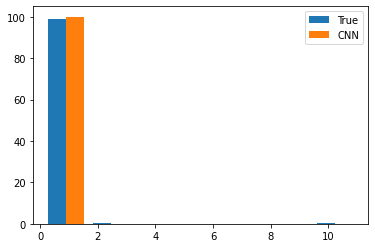

In [47]:
A = plt.hist(X,weights=wts,bins=7)
plt.legend(['True','CNN'])

In [40]:
print('ImgJ:','media=',np.mean(np.array(Diam1)),'desvio=',np.std(np.array(Diam1)),'pontos=',len(Diam1))

ImgJ: media= 1.0488562027957447 desvio= 0.7922576454370286 pontos= 175


In [41]:
print('Software:','media=',np.mean(np.array(Diameter_All)),'desvio=',np.std(np.array(Diameter_All)),'pontos=',len(Diameter_All))

Software: media= 1.1585815206911052 desvio= 0.2643520413912642 pontos= 25


In [42]:
np.mean(np.array(Diameter_All))

1.1585815206911052

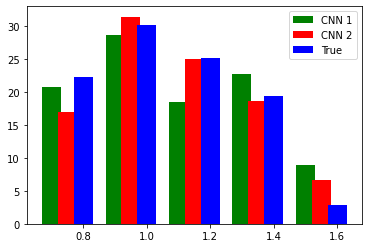

In [44]:
# Freq1 = [19.12043703, 29.22484843, 19.35872174, 20.82190224, 11.47409056] # avarage 4 samples
Freq1 = [20.69301557, 28.55598044, 18.50768331, 22.7106327, 8.905907357] # avarage 10 samples
#Freq2 = [16.93792791, 31.38008965, 24.93810752, 18.56158392, 6.233810752, 0.4]
Freq2 = [16.93792791, 31.38008965, 24.93810752, 18.56158392, 6.633810752]
Freq3 = [22.22489, 30.15078, 25.10463, 19.30926, 2.810434]
barWidth = 0.25

br1 = range(len(Freq1))
# Set position of bar on X axis
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]
# labels = [0.8, 1.0, 1.2, 1.4, 1.6, 1.8]
labels = [0.8, 1.0, 1.2, 1.4, 1.6]

xx=[]
for a in labels:
  xx.append(str(a))
plt.bar(br1, Freq1 , color="green", align="center", width=0.3, tick_label= xx) 
plt.bar(br2, Freq2 , color="red", align="center", width=0.3, tick_label= xx)
plt.bar(br3, Freq3 , color="blue", align="center", width=0.3, tick_label= xx)
plt.legend(['CNN 1','CNN 2','True'])